<a href="https://colab.research.google.com/github/Bunyodbekkk/About_Diabets/blob/main/Find_Diabets_update_Portfolio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [108]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import jaccard_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.tree import DecisionTreeClassifier

In [109]:
df=pd.read_csv('https://raw.github.com/anvarnarz/praktikum_datasets/main/diabetes.csv')
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [110]:
dict=["homilador bo’lish soni",'Glucose','BloodPressure','Teri_qalinligi','Insulin','KG', 'diabetning nasl funktsiyasi', 'Yosh','Diabet']
df.columns=dict

In [111]:
df['Diabet'].value_counts()
a=df[df['Diabet']==0].sample(232).index
df=df.drop(a)
df['Diabet'].value_counts()

1    268
0    268
Name: Diabet, dtype: int64

In [112]:
df.corrwith(df['Diabet']).abs().sort_values(ascending=False)

Diabet                         1.000000
Glucose                        0.505916
KG                             0.301236
Yosh                           0.293136
homilador bo’lish soni         0.258400
diabetning nasl funktsiyasi    0.131914
Insulin                        0.123976
Teri_qalinligi                 0.067848
BloodPressure                  0.056409
dtype: float64

In [113]:
X=df.drop('Diabet',axis=1).values
Y=df['Diabet']

In [114]:
scaler=StandardScaler()
X=scaler.fit_transform(X)

In [115]:
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,Y,test_size=0.2,random_state=42)

In [116]:
knn=KNeighborsClassifier(n_neighbors=19)
knn.fit(Xtrain,Ytrain)

KNeighborsClassifier(n_neighbors=19)

In [117]:
param_grid={'n_neighbors':np.arange(1,25)}
knn_gs=GridSearchCV(knn,param_grid,cv=5)
knn_gs.fit(X,Y)
knn_gs.best_params_

{'n_neighbors': 21}

In [118]:
param_grid={'n_neighbors':np.arange(1,25)}
knn_gs=GridSearchCV(knn,param_grid,cv=5)
knn_gs.fit(X,Y)
knn_gs.best_params_

{'n_neighbors': 21}

In [119]:
Ypred=knn.predict(Xtest)

In [120]:
predict=cross_val_predict(estimator=knn,X=X,y=Y,cv=5)

In [121]:
print('Classification report: \n',classification_report(Y,predict))

Classification report: 
               precision    recall  f1-score   support

           0       0.73      0.77      0.75       268
           1       0.75      0.71      0.73       268

    accuracy                           0.74       536
   macro avg       0.74      0.74      0.74       536
weighted avg       0.74      0.74      0.74       536



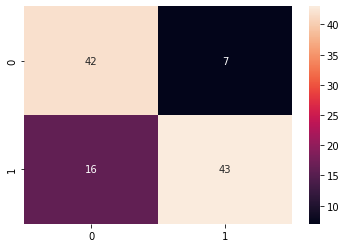

In [122]:
sns.heatmap(confusion_matrix(Ytest,Ypred),annot=True)

In [123]:
tree_model=DecisionTreeClassifier()
tree_model.fit(Xtrain,Ytrain)

DecisionTreeClassifier()

In [124]:
y_predict1=tree_model.predict(Xtest)

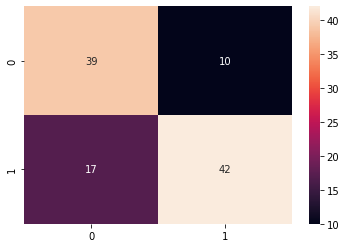

In [125]:
sns.heatmap(confusion_matrix(Ytest,y_predict1),annot=True)